In [1]:
import jax
from BFGS import bfgs,newton,lbfgs,gradient_descent,steepest_descent
import jax.numpy as jnp 
import matplotlib.pyplot as plt
from test_functions import *
import jax.random as jr
from IPython.display import Markdown
jax.config.update("jax_enable_x64", True)
plt.rcdefaults() # restore default settings
plt.rcParams.update({
    "text.usetex": True,
    "font.size": plt.rcParams["font.size"] * 1.5,
    "lines.linewidth": 3,

})
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
plt.rc('text.latex', preamble=r'\usepackage{bm}')
import time

### Gradient Descent on x^2

Max iterations reached


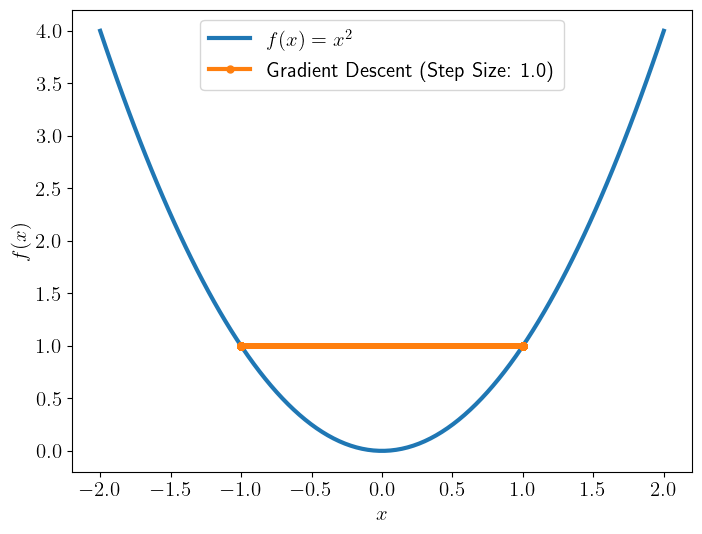

In [2]:
def quadratic(x):
    return jnp.sum(x**2)

x0 = jnp.array([1.0])
x = jnp.linspace(-2, 2, 100)
lr = 1.
xopt_gd, xs_gd = gradient_descent(quadratic, x0, lr, 100)
plt.figure(figsize=(8, 6))
plt.plot(x, jax.vmap(quadratic)(x),label='$f(x) = x^2$', color='C0')
plt.plot(xs_gd[:,0], jax.vmap(quadratic)(xs_gd),'.-',markersize=10., label=f'Gradient Descent (Step Size: {lr})', color='C1')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.savefig('./figs/gradient_descent_high_learning_rate.png', dpi =300, bbox_inches='tight')
plt.show()

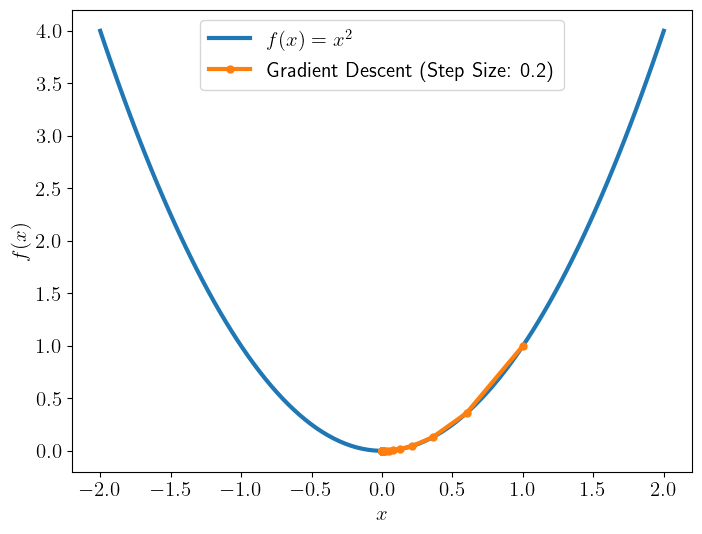

In [3]:
lr = 0.2
xopt_gd, xs_gd = gradient_descent(quadratic, x0, lr, 100)
plt.figure(figsize=(8, 6))
plt.plot(x, jax.vmap(quadratic)(x),label='$f(x) = x^2$', color='C0')
plt.plot(xs_gd[:,0], jax.vmap(quadratic)(xs_gd),'.-',markersize=10., label=f'Gradient Descent (Step Size: {lr})', color='C1')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.savefig('./figs/gradient_descent_low_learning_rate.png',dpi=300, bbox_inches='tight')
plt.show()

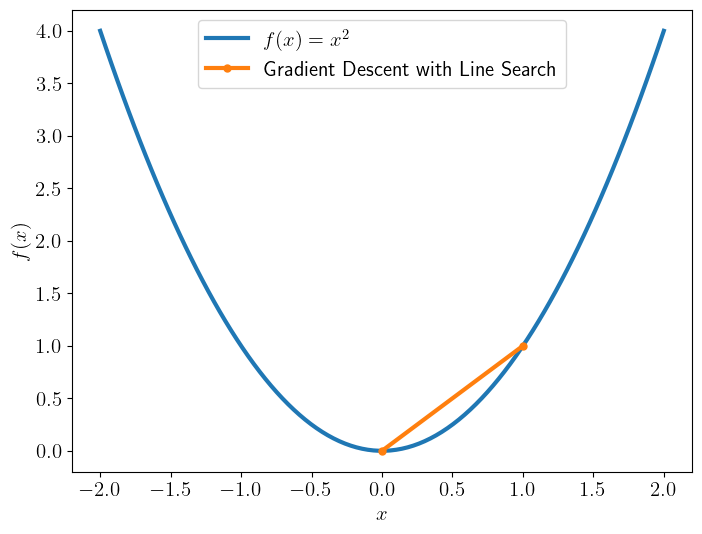

In [4]:
x0 = jnp.array([1.0])
xopt_steep, xs_steep = steepest_descent(quadratic, x0, 100)
plt.figure(figsize=(8, 6))
plt.plot(x, jax.vmap(quadratic)(x),label='$f(x) = x^2$', color='C0')
plt.plot(xs_steep[:,0], jax.vmap(quadratic)(xs_steep),'.-',markersize=10., label='Gradient Descent with Line Search', color='C1')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.savefig('./figs/steepest_descent.png', dpi =300, bbox_inches='tight')
plt.show()


### Rosenbrock Function
$$
f_{Rosenbrock}(x_1,x_2) = 100*(x_2 - x_1^2)^2 + (1-x_1)^2
$$

In [5]:
def rosenbrock(x):
    return 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2

### Contour plot of convergence of BFGS on RosenBrock Function

Max iterations reached
BFGS:  [0.99999387 0.9999872 ]
Newton:  [0.999986   0.99997163]
LBFGS:  [1. 1.]
GD:  [0.67388605 0.45255952]


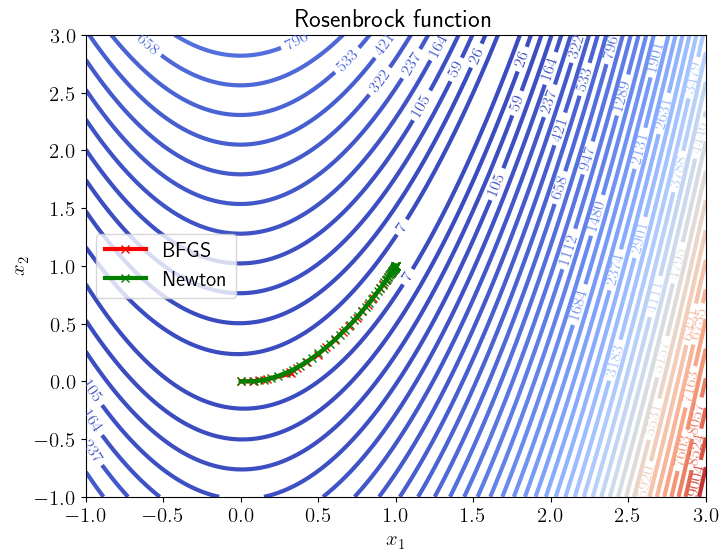

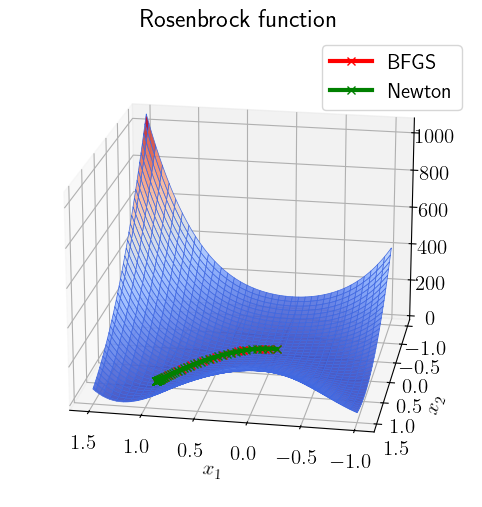

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches((8, 6))

xopt_bfgs, xs_bfgs = bfgs(rosenbrock, jnp.array([0.,0.]), tol=1e-10)
xopt_newton, xs_newton = newton(rosenbrock, jnp.array([0.,0.]), tol=1e-10)
xopt_lbfgs, xs_lbfgs = lbfgs(rosenbrock, jnp.array([0.,0.]), tol=1e-10)
xopt_gd, xs_gd = gradient_descent(rosenbrock, jnp.array([0.,0.]), tol=1e-10)
print('BFGS: ', xopt_bfgs)
print('Newton: ', xopt_newton)
print('LBFGS: ', xopt_lbfgs)
print('GD: ', xopt_gd)

x = jnp.linspace(-1., 3, 400)
x1, x2 = jnp.meshgrid(x, x)
z = jax.vmap(rosenbrock)(jnp.stack([x1.flatten(), x2.flatten()], axis=1)).reshape(x1.shape)

cf = ax.contour(x2,x1,z.T, cmap='coolwarm',levels=jnp.max(z)*jnp.linspace(0, 1.0, 40)**2)
ax.clabel(cf, fontsize=12)

z_bfgs= jax.vmap(rosenbrock)(xs_bfgs)# Evaluate Rosenbrock at xs
z_newton= jax.vmap(rosenbrock)(xs_newton)# Evaluate Rosenbrock at xs
z_lbfgs= jax.vmap(rosenbrock)(xs_lbfgs)# Evaluate Rosenbrock at xs
z_gd= jax.vmap(rosenbrock)(xs_gd)# Evaluate Rosenbrock at xs
# ax.plot(xs_gd[:,0],xs_gd[:,1],'x-',alpha=1.,color='blue',label='GD')
# ax.plot(xs_lbfgs[:,0],xs_lbfgs[:,1],'x-',alpha=1.,color='orange',label='LBFGS')
ax.plot(xs_bfgs[:,0],xs_bfgs[:,1],'x-',alpha=1.,color='red',label='BFGS')
ax.plot(xs_newton[:,0],xs_newton[:,1],'x-',alpha=1.,color='green',label='Newton')

ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_title(r'Rosenbrock function')

ax.legend()
plt.savefig('./figs/rosenbrock_contour.png', dpi =300, bbox_inches='tight')
plt.show()
fig = plt.figure()
fig.set_size_inches((8, 6))
x = jnp.linspace(-1., 1.5, 300)
x1, x2 = jnp.meshgrid(x, x)
z = jax.vmap(rosenbrock)(jnp.stack([x1.flatten(), x2.flatten()], axis=1)).reshape(x1.shape)
# xs = jax.random.uniform(jax.random.PRNGKey(0), (20, 2), minval=-2.0, maxval=2.0)


z_bfgs= jax.vmap(rosenbrock)(xs_bfgs)+10.# Evaluate Rosenbrock at xs
z_newton= jax.vmap(rosenbrock)(xs_newton)+10.# Evaluate Rosenbrock at xs
ax = fig.add_subplot(111,projection='3d',computed_zorder=False)
ax.plot(xs_bfgs[:,0],xs_bfgs[:,1],z_bfgs,'x-',alpha=1.,color='red', label='BFGS')
ax.plot(xs_newton[:,0],xs_newton[:,1],z_newton,'x-',alpha=1.,color='green',label='Newton')
ax.plot_surface(x1,x2,z, cmap='coolwarm',edgecolor = 'royalblue',lw=0.5,alpha=0.9,rstride=8,cstride=8)
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_title(r'Rosenbrock function')
ax.view_init(20, 100)
ax.legend()
plt.savefig('./figs/rosenbrock_surface.png', dpi =300, bbox_inches='tight')
plt.show()

### Griewank Function
$$
f_{Griewank}(x_1,x_2) = 
\sum_{i=1}^2 \frac{x_i^2}{4000}-\prod_{i=1}^2 \cos \left(\frac{x_i}{\sqrt{i}}\right)+1
$$


In [7]:
f5(jnp.array([0.,0.]))

Array(0., dtype=float64)

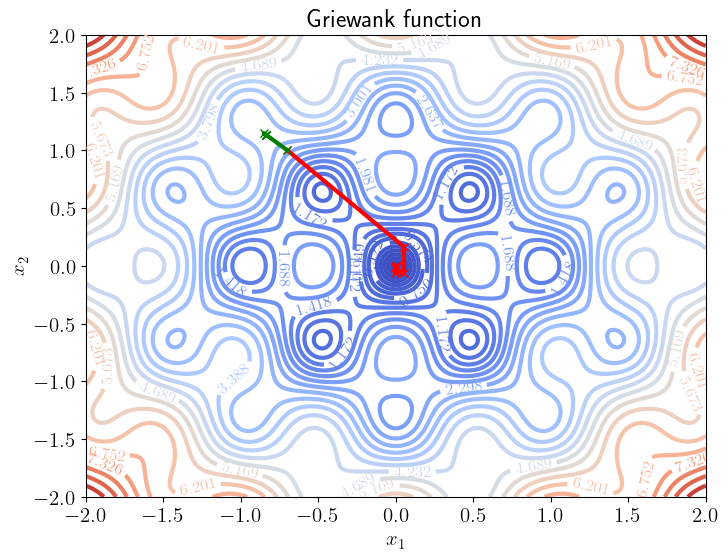

BFGS: [-2.85601494e-07 -2.54940346e-06]
Newton: [-0.84040903  1.13334606]


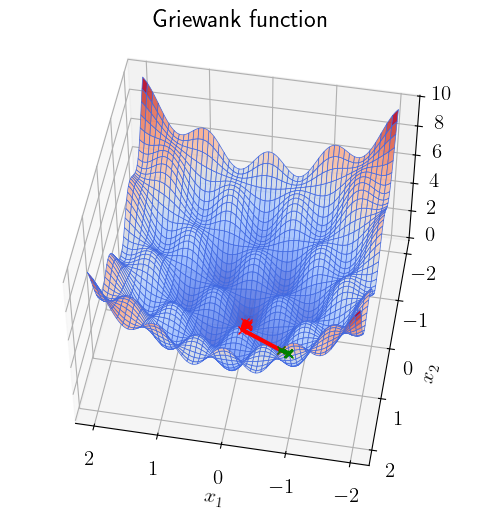

In [8]:
x0 = jnp.array([-.7,1.])
xopt_bfgs, xs_bfgs = bfgs(f5, x0, tol=1e-10)
xopt_newton, xs_newton = newton(f5, x0, tol=1e-10)
fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches((8, 6))

x = jnp.linspace(-2., 2, 400)
x1, x2 = jnp.meshgrid(x, x)
z = jax.vmap(f5)(jnp.stack([x1.flatten(), x2.flatten()], axis=1)).reshape(x1.shape)

cf = ax.contour(x2,x1,z.T, cmap='coolwarm',levels=jnp.max(z)*jnp.linspace(0, 1.0, 30)**2)
ax.clabel(cf, fontsize=12)

ax.plot(xs_bfgs[:,0],xs_bfgs[:,1],'x-',alpha=1.,color='red', label='BFGS')
ax.plot(xs_newton[:,0],xs_newton[:,1],'x-',alpha=1.,color='green', label='Newton')

ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_title(r'Griewank function')
plt.show()

fig = plt.figure()
fig.set_size_inches((8, 6))
z = jax.vmap(f5)(jnp.stack([x1.flatten(), x2.flatten()], axis=1)).reshape(x1.shape)

# xs = jax.random.uniform(jax.random.PRNGKey(0), (20, 2), minval=-2.0, maxval=2.0)


z_bfgs= jax.vmap(f5)(xs_bfgs)
z_newton=jax.vmap(f5)(xs_newton)
ax = fig.add_subplot(111,projection='3d',computed_zorder=False)
ax.plot(xs_bfgs[:,0],xs_bfgs[:,1],z_bfgs,'x-',alpha=1.,color='red')
ax.plot(xs_newton[:,0],xs_newton[:,1],z_newton,'x-',alpha=1.,color='green')
ax.plot_surface(x1,x2,z, cmap='coolwarm',edgecolor = 'royalblue',lw=0.5,alpha=0.9,rstride=8,cstride=8)
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_title(r'Griewank function')
ax.view_init(50, 100)
print('BFGS:',xopt_bfgs)
print('Newton:',xopt_newton)
plt.show()

In [9]:
i=0
def test_function(x):
    global i
    i=i+1
    return f5(x)
xopt, xs = bfgs(test_function, jnp.array([-1.,.7]), tol=1e-10)
print("Number of function evaluations BFGS: ", i)
i=0
xopt, xs = newton(test_function, jnp.array([-1.,.7]), tol=1e-10)
print("Number of function evaluations Newton: ", i)
i=0
xopt, xs = gradient_descent(test_function, jnp.array([-1.,.7]), tol=1e-10)
print("Number of function evaluations Gradient Descent: ", i)



Number of function evaluations BFGS:  132
Number of function evaluations Newton:  25
Max iterations reached
Number of function evaluations Gradient Descent:  1001


In [10]:
fs = [f1,f2,f3, f4, f5,f6, f7,f8,f9,f10]
key = jr.PRNGKey(0)
x0s = [
    jnp.array([-0.1,.5]), # Adjiman
    jr.uniform(key, (100,), minval=-3.0, maxval=3.0), # Rosenbrock N-D
    jr.uniform(key, (10,), minval=8.0, maxval=10.0), # Paviani
    jr.uniform(key, (10,), minval=-0.5, maxval=.5), # Csendes
    jnp.array([-0.7,1.]), # Griewank
   jr.uniform(key, (2,), minval=1.0,maxval=5.),#Hosaki
    jr.uniform(key, (2,), minval=-1.0,maxval=1.), #Brent
    jr.uniform(key, (2,), minval=.0,maxval=1.), #  Giunta
    jr.uniform(key, (2,), minval=-4.0,maxval=-1.), # Styblinski-Tang
    jr.uniform(key, (6,), minval=-6.0,maxval=6.),
]
names = [
    "Adjiman Function",
    "Rosenbrock N-D",
    "Paviani Function",
    "Csendes Function",
    "Griewank Function",
    "Hosaki Function",
    "Brent Function",
    "Giunta Function",
    "Styblinski-Tang Function",
    "Trid 6 Function",
]
tstr = ""
tstr += f"Function | BFGS | Newton | LBFGS | GD\n"
tstr += f"---|---|---|---|---|\n"
tstr2 = ""
tstr2 += f"Function | BFGS | Newton | LBFGS | GD\n"
tstr2 += f"---|---|---|---|---|\n"
tstr3 = ""
tstr3 += f"Function | BFGS | Newton | LBFGS | GD\n"
tstr3 += f"---|---|---|---|---|\n"
tstr4 = ""
tstr4 += f"Function | BFGS | Newton | LBFGS | GD\n"
k=0
for i in range(len(fs)):
    def f(x):
        global k
        k = k + 1
        return fs[i](x)
    x0 = x0s[i]
    print(f"Function {i+1}: {names[i]}")
    time_bfgs = 0
    time_newton = 0
    time_lbfgs = 0
    time_gd = 0
    fun_evals_bfgs = 0
    fun_evals_newton = 0
    fun_evals_lbfgs = 0
    fun_evals_gd = 0

    start = time.time()
    xopt_bfgs, xs_bfgs = bfgs(f, x0,zoom_method="strong_wolfe", max_iter =1000, tol=1e-10)
    time_bfgs = time.time() - start
    fun_evals_bfgs = k   
    k=0
    start = time.time()
    xopt_newton, xs_newton = newton(f, x0 ,max_iter = 1000, tol=1e-10)
    time_newton = time.time() - start
    fun_evals_newton = k
    k=0
    start = time.time()
    xopt_lbfgs, xs_lbfgs = lbfgs(f, x0,zoom_method='strong_wolfe',max_iter =1000, tol=1e-10)
    time_lbfgs = time.time() - start
    fun_evals_lbfgs = k
    k=0
    start = time.time()
    xopt_gd, xs_gd = gradient_descent(f, x0,max_iter =1000, tol=1e-10)
    time_gd = time.time() - start
    fun_evals_gd = k
    # print(f(xopt_bfgs),f(xopt_newton),f(xopt_lbfgs),f(xopt_gd))
    grad_f = jax.grad(f)
    tstr += f"{names[i]}({x0.shape[0]} - D) | {jnp.linalg.norm(grad_f(xopt_bfgs)):.2e} | {jnp.linalg.norm(grad_f(xopt_newton)):.2e} | {jnp.linalg.norm(grad_f(xopt_lbfgs)):.2e} | {jnp.linalg.norm(grad_f(xopt_gd)):.2e}\n"
    tstr2 += f"{names[i]}({x0.shape[0]} - D) | {time_bfgs/xs_bfgs.shape[0]:.6e} | {time_newton/xs_newton.shape[0]:.6e} | {time_lbfgs/xs_lbfgs.shape[0]:.6e} | {time_gd/xs_gd.shape[0]:.6e}\n"
    tstr3 += f"{names[i]}({x0.shape[0]} - D) | {fun_evals_bfgs} | {fun_evals_newton} | {fun_evals_lbfgs} | {fun_evals_gd}\n"
    tstr4 += f"{names[i]}({x0.shape[0]} - D) | {xs_bfgs.shape[0]} | {xs_newton.shape[0]} | {xs_lbfgs.shape[0]} | {xs_gd.shape[0]}\n"
    # tstr += f"---|---|---|---|---|\n"
    # print(f(xopt_bfgs),f(xopt_newton),f(xopt_lbfgs),f(xopt_gd))
display(Markdown(tstr))
display(Markdown(tstr2))
display(Markdown(tstr3))
display(Markdown(tstr4))

Function 1: Adjiman Function
Max iterations reached
Function 2: Rosenbrock N-D
Max iterations reached
Function 3: Paviani Function
Line Search Failed
Line Search Failed
Line Search Failed
Max iterations reached
Function 4: Csendes Function
Max iterations reached
Function 5: Griewank Function
Line Search Failed
Max iterations reached
Function 6: Hosaki Function
Max iterations reached
Function 7: Brent Function
Max iterations reached
Function 8: Giunta Function
Max iterations reached
Function 9: Styblinski-Tang Function
Function 10: Trid 6 Function
Max iterations reached


Function | BFGS | Newton | LBFGS | GD
---|---|---|---|---|
Adjiman Function(2 - D) | nan | 4.61e-05 | nan | 7.70e-01
Rosenbrock N-D(100 - D) | 8.10e-13 | 5.13e-04 | 7.45e-11 | 2.92e+00
Paviani Function(10 - D) | 7.68e+01 | nan | nan | 8.72e-02
Csendes Function(10 - D) | 2.47e-06 | 1.21e-03 | 6.99e-11 | 7.48e-02
Griewank Function(2 - D) | 5.67e-05 | 8.88e-16 | nan | 8.31e-09
Hosaki Function(2 - D) | nan | 3.17e-05 | nan | 8.66e-02
Brent Function(2 - D) | 1.78e-05 | 2.51e-05 | 6.64e-11 | 3.67e+00
Giunta Function(2 - D) | 6.87e-05 | 9.40e-05 | nan | 1.29e-08
Styblinski-Tang Function(2 - D) | 5.92e-05 | 1.12e-04 | 7.25e-11 | 9.96e-11
Trid 6 Function(6 - D) | 2.24e-05 | 2.47e-05 | nan | 4.08e+00


Function | BFGS | Newton | LBFGS | GD
---|---|---|---|---|
Adjiman Function(2 - D) | 1.578987e-01 | 4.595299e-02 | 5.561971e-02 | 8.156375e-03
Rosenbrock N-D(100 - D) | 3.708846e-02 | 4.973597e-02 | 2.633710e-02 | 6.887283e-03
Paviani Function(10 - D) | 1.906885e+00 | 4.620270e-01 | 6.520407e-01 | 8.118761e-03
Csendes Function(10 - D) | 3.117742e-02 | 3.423100e-02 | 3.911464e-02 | 4.555371e-03
Griewank Function(2 - D) | 2.905544e-02 | 2.507261e-02 | 5.688327e-02 | 8.767886e-03
Hosaki Function(2 - D) | 2.099967e-01 | 9.287785e-02 | 1.452495e-01 | 1.755536e-02
Brent Function(2 - D) | 3.901308e-02 | 6.015482e-02 | 4.260937e-02 | 1.143260e-02
Giunta Function(2 - D) | 5.460438e-02 | 5.553410e-02 | 4.192061e-02 | 1.088659e-02
Styblinski-Tang Function(2 - D) | 3.504026e-02 | 3.387090e-02 | 2.629988e-02 | 8.702465e-03
Trid 6 Function(6 - D) | 5.587349e-02 | 3.753668e-02 | 2.398490e-02 | 5.585028e-03


Function | BFGS | Newton | LBFGS | GD
---|---|---|---|---|
Adjiman Function(2 - D) | 678 | 461 | 544 | 1001
Rosenbrock N-D(100 - D) | 2006 | 1275 | 1544 | 1001
Paviani Function(10 - D) | 1210 | 7 | 407 | 1001
Csendes Function(10 - D) | 1481 | 509 | 1037 | 1001
Griewank Function(2 - D) | 1143 | 31 | 427 | 1001
Hosaki Function(2 - D) | 1061 | 1038 | 54 | 1001
Brent Function(2 - D) | 1124 | 1069 | 176 | 1001
Giunta Function(2 - D) | 1111 | 831 | 214 | 1001
Styblinski-Tang Function(2 - D) | 1139 | 925 | 196 | 730
Trid 6 Function(6 - D) | 902 | 1037 | 224 | 1001


Function | BFGS | Newton | LBFGS | GD
Adjiman Function(2 - D) | 20 | 35 | 33 | 1001
Rosenbrock N-D(100 - D) | 101 | 92 | 309 | 1001
Paviani Function(10 - D) | 1 | 2 | 3 | 1001
Csendes Function(10 - D) | 42 | 29 | 70 | 1001
Griewank Function(2 - D) | 18 | 6 | 36 | 1001
Hosaki Function(2 - D) | 2 | 75 | 2 | 1001
Brent Function(2 - D) | 17 | 77 | 36 | 1001
Giunta Function(2 - D) | 14 | 60 | 34 | 1001
Styblinski-Tang Function(2 - D) | 18 | 67 | 39 | 730
Trid 6 Function(6 - D) | 24 | 75 | 37 | 1001


In [11]:
display(Markdown(tstr))


Function | BFGS | Newton | LBFGS | GD
---|---|---|---|---|
Adjiman Function(2 - D) | nan | 4.61e-05 | nan | 7.70e-01
Rosenbrock N-D(100 - D) | 8.10e-13 | 5.13e-04 | 7.45e-11 | 2.92e+00
Paviani Function(10 - D) | 7.68e+01 | nan | nan | 8.72e-02
Csendes Function(10 - D) | 2.47e-06 | 1.21e-03 | 6.99e-11 | 7.48e-02
Griewank Function(2 - D) | 5.67e-05 | 8.88e-16 | nan | 8.31e-09
Hosaki Function(2 - D) | nan | 3.17e-05 | nan | 8.66e-02
Brent Function(2 - D) | 1.78e-05 | 2.51e-05 | 6.64e-11 | 3.67e+00
Giunta Function(2 - D) | 6.87e-05 | 9.40e-05 | nan | 1.29e-08
Styblinski-Tang Function(2 - D) | 5.92e-05 | 1.12e-04 | 7.25e-11 | 9.96e-11
Trid 6 Function(6 - D) | 2.24e-05 | 2.47e-05 | nan | 4.08e+00
